# Synthetic data test: Try different structural indices

In [1]:
import numpy as np
import harmonica as hm
import verde as vd
import matplotlib.pyplot as plt
import xrft
import euler

In [2]:
region = [0, 35e3, 0, 25e3]
coordinates = vd.grid_coordinates(region, spacing=300, extra_coords=1000)
inclination, declination = 35, -20
base_level = 300
noise_level = 10
main_field = hm.magnetic_angles_to_vec(1, inclination, declination)
true_coordinates = (15e3, 10e3, 0e3)

In [3]:
datasets = {}

## Dipole

In [4]:
magnetic_field = hm.dipole_magnetic(
    coordinates,
    dipoles=true_coordinates,
    magnetic_moments=hm.magnetic_angles_to_vec(1e10, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["dipole"] = data

/home/leo/miniforge3/envs/euler-inversion/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


## Pipe

In [5]:
size = 50
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - size,
        true_coordinates[0] + size,
        true_coordinates[1] - size,
        true_coordinates[1] + size,
        true_coordinates[2] - 15e3,
        true_coordinates[2],
    ],
    magnetization=hm.magnetic_angles_to_vec(1500, 90, 0),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["pipe"] = data

/home/leo/miniforge3/envs/euler-inversion/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


## Dike

In [6]:
# magnetic_field = hm.prism_magnetic(
#     coordinates,
#     prisms=[
#         true_coordinates[0] - 50e3,
#         true_coordinates[0] + 50e3,
#         true_coordinates[1] - 100,
#         true_coordinates[1] + 100,
#         true_coordinates[2] - 7e3,
#         true_coordinates[2],
#     ],
#     magnetization=hm.magnetic_angles_to_vec(40, inclination, declination),
#     field="b",
# )
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - 100,
        true_coordinates[0] + 100,
        true_coordinates[1] - 50e3,
        true_coordinates[1] + 50e3,
        true_coordinates[2] - 7e3,
        true_coordinates[2],
    ],
    magnetization=hm.magnetic_angles_to_vec(40, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["dike"] = data

/home/leo/miniforge3/envs/euler-inversion/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


## Line

In [7]:
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - 50,
        true_coordinates[0] + 50,
        true_coordinates[1] - 50e3,
        true_coordinates[1],
        true_coordinates[2] - 50,
        true_coordinates[2] + 50,
    ],
    magnetization=hm.magnetic_angles_to_vec(1000, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["line"] = data

/home/leo/miniforge3/envs/euler-inversion/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


## Plot the data

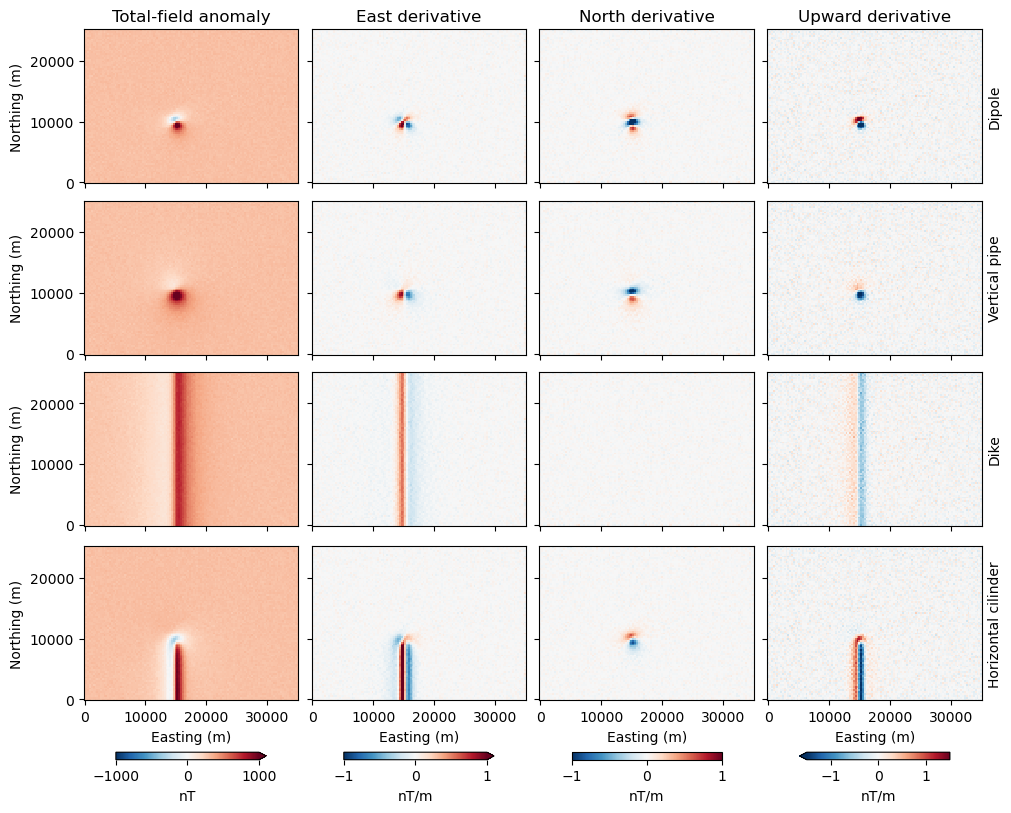

In [8]:
model_names = {
    "dipole": "Dipole",
    "line": "Horizontal cilinder",
    "pipe": "Vertical pipe",
    "dike": "Dike",
}
units = {"field": "nT", "deriv_east": "nT/m", "deriv_north": "nT/m", "deriv_up": "nT/m"}
scale = {"field": 1000, "deriv_east": 1, "deriv_north": 1, "deriv_up": 1.5}
titles = {
    "field": "Total-field anomaly",
    "deriv_east": "East derivative",
    "deriv_north": "North derivative",
    "deriv_up": "Upward derivative",
}

fig, axes = plt.subplots(
    4, 4, figsize=(10, 8), layout="constrained", sharex=True, sharey=True
)
for i, model in enumerate(datasets):
    for field, ax in zip(titles, axes[i, :].ravel()):
        if i == axes.shape[0] - 1:
            kwargs = dict(
                add_colorbar=True,
                cbar_kwargs=dict(
                    orientation="horizontal", aspect=20, shrink=0.7, label=units[field]
                ),
            )
        else:
            kwargs = dict(add_colorbar=False)
        datasets[model][field].plot.pcolormesh(
            ax=ax,
            add_labels=False,
            cmap="RdBu_r",
            vmin=-scale[field],
            vmax=scale[field],
            **kwargs
        )
        ax.set_aspect("equal")
for ax in axes[:, 0]:
    ax.set_ylabel("Northing (m)")
for ax in axes[-1, :]:
    ax.set_xlabel("Easting (m)")
for ax, model in zip(axes[:, -1], datasets):
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(model_names[model])
for ax, field in zip(axes[0, :], titles):
    ax.set_title(titles[field])
plt.show()

## Run Euler Inversion

In [9]:
structural_indices = [1, 2, 3]
rmse = {}
solutions = {}
for model in ["dipole", "line", "pipe", "dike"]:
    print(f"{model.capitalize()}:")
    data = datasets[model]
    rmse[model] = []
    solutions[model] = []
    for si in structural_indices:
        ei = euler.EulerInversion(structural_index=si).fit_grid(data)
        solutions[model].append(ei)
        rmse[model].append(ei.data_misfit_[-1])
        print(f"  SI={si} | RMSE={rmse[model][-1]} | Position={ei.location_}")

Dipole:
  SI=1 | RMSE=0.3297944132846975 | Position=[15026.44062434 10033.64084668   645.829773  ]
  SI=2 | RMSE=0.2618884280778848 | Position=[14999.86447433 10007.54461774   330.47704751]
  SI=3 | RMSE=0.25194214648777324 | Position=[15000.05799137  9997.83980371   -23.16587399]
Line:
  SI=1 | RMSE=0.2734785910486863 | Position=[15039.85063165 10051.18961503   461.8907596 ]
  SI=2 | RMSE=0.25449134413063357 | Position=[1.50016154e+04 9.98720645e+03 5.31144183e+00]
  SI=3 | RMSE=0.27091202978578877 | Position=[15001.04821755  9991.52303603  -484.89804326]
Pipe:
  SI=1 | RMSE=0.2837862960273522 | Position=[15046.52447799 10087.87247858   520.38473534]
  SI=2 | RMSE=0.25417794840284585 | Position=[1.49990623e+04 9.99022172e+03 8.06166482e+00]
  SI=3 | RMSE=0.2726577232843763 | Position=[15002.82294017  9982.46253106  -593.71157763]
Dike:
  SI=1 | RMSE=0.2595009735961167 | Position=[15006.2008234  12578.7967733    111.76310401]
  SI=2 | RMSE=0.2824604706228264 | Position=[15006.26164887 

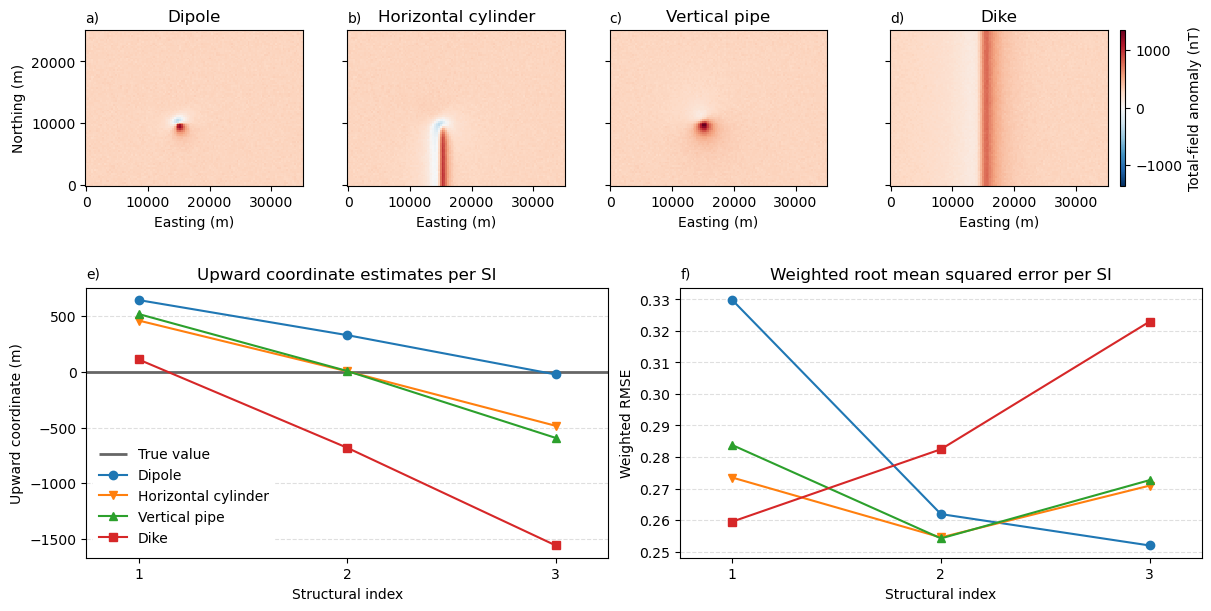

In [10]:
fig = plt.figure(figsize=(12, 6), layout="constrained")
figures = fig.subfigures(2, 1, height_ratios=(1, 1.5), hspace=0.1)

axes = figures[0].subplots(1, 4, sharey=True)
model_names = {
    "dipole": "Dipole",
    "line": "Horizontal cylinder",
    "pipe": "Vertical pipe",
    "dike": "Dike",
}
scale = vd.maxabs([datasets[model].field.values for model in datasets])
for ax, model, label in zip(axes, model_names, "abcd"):
    ax.set_aspect("equal")
    tmp = datasets[model].field.plot.pcolormesh(
        ax=ax,
        add_labels=False,
        add_colorbar=False,
        cmap="RdBu_r",
        vmin=-scale,
        vmax=scale,
    )
    ax.set_title(model_names[model])
    ax.set_xlabel("Easting (m)")
    ax.text(0, 1.05, f"{label})", transform=ax.transAxes)
figures[0].colorbar(tmp, ax=axes[-1], aspect=30, label="Total-field anomaly (nT)")
axes[0].set_ylabel("Northing (m)")

colors = list(plt.rcParams["axes.prop_cycle"].by_key()["color"])
markers = ["o", "v", "^", "s"]

xlim = 0.75, 3.25

axes = figures[1].subplots(1, 2)
ax = axes[0]
ax.hlines(0, *xlim, colors="#666666", linestyles="-", linewidths=2, label="True value")
for model, color, marker in zip(solutions, colors, markers):
    z = [ei.location_[-1] for ei in solutions[model]]
    ax.plot(structural_indices, z, color=color, marker=marker, label=model_names[model])
ax.set_xlabel("Structural index")
ax.set_xlim(*xlim)
ax.set_xticks([1, 2, 3])
ax.set_ylabel("Upward coordinate (m)")
ax.set_title("Upward coordinate estimates per SI")
ax.legend(
    loc="lower left",
    framealpha=1,
    facecolor="#ffffff",
    edgecolor="#ffffff",
)
ax.text(0, 1.035, "e)", transform=ax.transAxes)
ax.grid(axis="y", alpha=0.4, linestyle="--")

ax = axes[1]
for model, color, marker in zip(rmse, colors, markers):
    ax.plot(
        structural_indices,
        rmse[model],
        color=color,
        marker=marker,
        label=model_names[model],
    )
ax.set_xlabel("Structural index")
ax.set_xlim(0.75, 3.25)
ax.set_xticks([1, 2, 3])
ax.set_ylabel("Weighted RMSE")
ax.set_title("Weighted root mean squared error per SI")
ax.text(0, 1.035, "f)", transform=ax.transAxes)
ax.grid(axis="y", alpha=0.4, linestyle="--")

fig.savefig(
    "../paper/figures/synthetic-structural-index.png", dpi=300, bbox_inches="tight"
)

plt.show()